In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
tick = pd.read_csv("test_tick_happy_path.csv")
tick["date-time"] = pd.to_datetime(tick["date-time"])
tick.set_index("date-time", inplace=True)

## Plot Tick

<Axes: xlabel='date-time'>

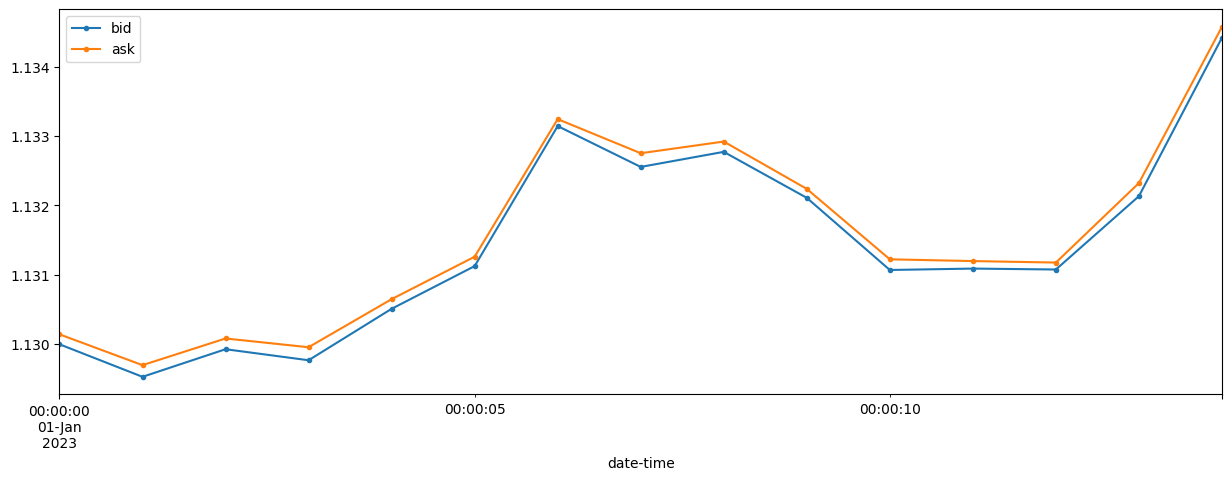

In [3]:
tick[["bid","ask"]][0:15].plot(marker=".", figsize=(15,5))

## Plot Spread Distribution

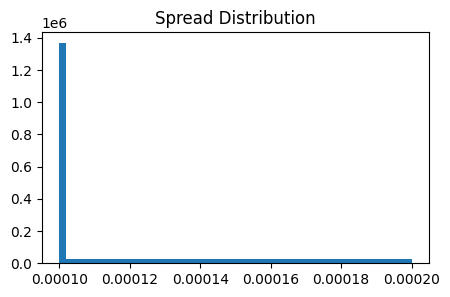

In [4]:
fig, ax = plt.subplots(1, figsize=(5,3))
tick["spread"].hist(bins=50, ax = ax)
ax.grid(False)
ax.set_title("Spread Distribution")
plt.show()

## Plot Return Deistribution

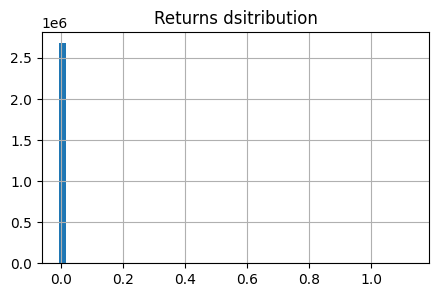

In [5]:
fig, ax = plt.subplots(1, figsize=(5,3))
ax.grid(False)
tick["delta_p"].hist(bins=50, ax=ax)
ax.set_title("Returns dsitribution")
plt.show()

In [6]:
tick.describe()

,delta_p,bid,spread,ask
count,2.678401e+06,2.678401e+06,2.678401e+06,2.678401e+06
mean,2.450116e-06,4.483209e+00,1.250013e-04,4.483334e+00
std,1.214971e-03,1.550269e+00,3.227383e-05,1.550269e+00
min,-4.772279e-03,1.070997e+00,1.000000e-04,1.071097e+00
25%,-6.725408e-04,3.303204e+00,1.000000e-04,3.303333e+00
50%,2.686030e-06,5.028701e+00,1.000000e-04,5.028830e+00
75%,6.763522e-04,5.784723e+00,1.500465e-04,5.784847e+00
max,1.130000e+00,6.664823e+00,2.000000e-04,6.664975e+00


In [7]:
tick.tail()

,delta_p,bid,spread,ask
date-time,,,,
2023-01-31 23:59:56,-0.000225,6.562136,0.000100,6.562236
2023-01-31 23:59:57,0.000682,6.562818,0.000100,6.562918
2023-01-31 23:59:58,-0.000898,6.561920,0.000111,6.562031
2023-01-31 23:59:59,-0.000212,6.561709,0.000100,6.561809
2023-02-01 00:00:00,0.000684,6.562393,0.000100,6.562493


In [8]:
ohlc = tick["bid"].resample("1h").ohlc()

## Plot OHLC

In [9]:
ohlc = pd.read_csv("ohlc_bid_1h.csv")
ohlc["date-time"] = pd.to_datetime(ohlc["date-time"])
ohlc.set_index("date-time", inplace=True)

In [10]:
ohlc.head()

,open,high,low,close
date-time,,,,
2023-01-01 00:00:00,1.130000,1.152300,1.042850,1.042986
2023-01-01 01:00:00,1.042312,1.048631,0.919833,1.000835
2023-01-01 02:00:00,1.002245,1.047926,0.956514,1.008930
2023-01-01 03:00:00,1.007544,1.098564,1.000386,1.033729
2023-01-01 04:00:00,1.034589,1.042073,0.905451,0.907792


/home/mchiuminatto/work/dev/synthetick/venv_310/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


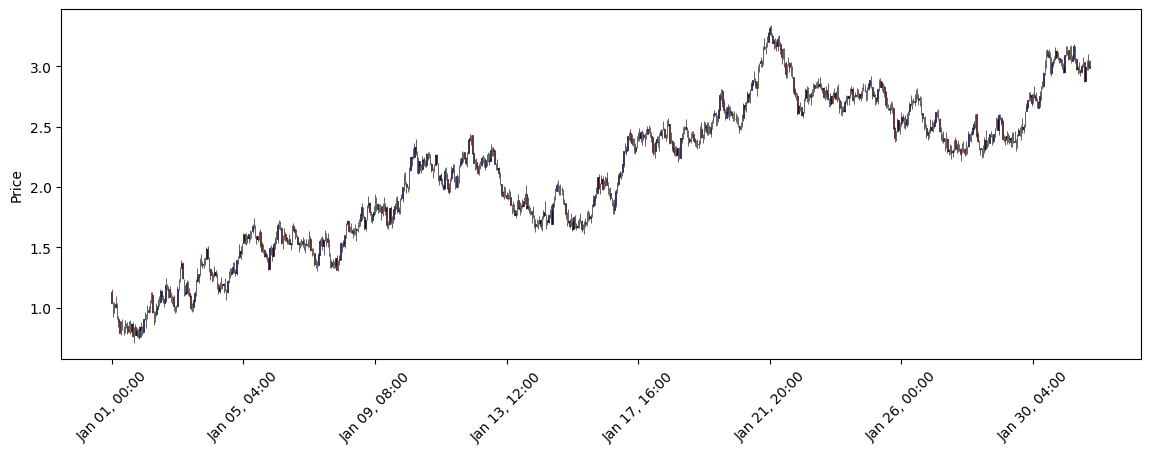

In [13]:
mc2 = mpf.make_marketcolors(up='blue',down='r')
s2  = mpf.make_mpf_style(marketcolors=mc2)
mpf.plot(ohlc[0:2000], type="candle", figsize=(15,5), style=s2)

In [12]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.

